Nama: Diaz Islami <br>
NIM: A11.2020.13116 <br>
Kelompok: BKDS02 <br>

#1) Mengumpulkan Data

In [ ]:
# Deskripsi:
# Data diperoleh dengan cara mendownload langsung dari website UCI Machine Learning -
# yang mana berdasarkan informasi dari data tersebut bahwa data diperoleh dari lokasi -
# Cleveland Clinic Foundation yang dibuat oleh Robert Detrano, M.D., Ph.D. Data yang -
# diperoleh tidak memerlukan tindakan khusus tertentu seperti menggabungkan dataset dari berbagai sumber.


# load dataset
path = "/content/cleveland.data"
with open(path, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

In [ ]:
import itertools

# merapikan dataset
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
)

In [ ]:
import pandas as pd
import numpy as np

# mengubah dataset menjadi dataframe
df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1,0,63,1,-9,-9,-9,-9,1,145,...,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,...,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,...,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,...,1,1,1,1,1,1,1,-9,-9,name


# 2) Menelaah Data

In [ ]:
# lihat tipe dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       282 non-null    object
 1   1       282 non-null    object
 2   2       282 non-null    object
 3   3       282 non-null    object
 4   4       282 non-null    object
 5   5       282 non-null    object
 6   6       282 non-null    object
 7   7       282 non-null    object
 8   8       282 non-null    object
 9   9       282 non-null    object
 10  10      282 non-null    object
 11  11      282 non-null    object
 12  12      282 non-null    object
 13  13      282 non-null    object
 14  14      282 non-null    object
 15  15      282 non-null    object
 16  16      282 non-null    object
 17  17      282 non-null    object
 18  18      282 non-null    object
 19  19      282 non-null    object
 20  20      282 non-null    object
 21  21      282 non-null    object
 22  22      282 non-null    ob

In [ ]:
# karena dataset masih bertipe object, maka perlu diubah menjadi float
# sebelum mengubah dataset menjadi float, perlu menghilangkan atribut id dan name dari dataset
df = df.iloc[:, :-1] # total -> 75 kolom
df = df.drop(df.columns[0], axis=1) # total -> 74 kolom dimulai indeks ke 0
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       282 non-null    float64
 4   5       282 non-null    float64
 5   6       282 non-null    float64
 6   7       282 non-null    float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      282 non-null    float64
 12  13      282 non-null    float64
 13  14      282 non-null    float64
 14  15      282 non-null    float64
 15  16      282 non-null    float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      282 non-null    float64
 22  23

# 3) Memvalidasi Data

Dilihat dari dataset, tidak ada pola atau tren tertentu yang terlihat. Namun, berdasarkan informasi dari data bahwa nilai dari -9.0 merupakan nilai missing value yang terdapat dalam dataset sehingga perlu dilakukan penanganan terlebih dahulu terhadap nilai tersebut yang ada dalam atribut tertentu.

In [ ]:
import re
import pickle

# dalam tahap validasi ini, akan digunakan teknik validasi data manual dan statistik
# teknik validasi manual untuk melihat karakteristik data secara langsung
# teknik validasi statistik dilakukan untuk melihat nilai minimum, maksimum, dll

In [ ]:
# berdasarkan penjelasan sebelumnya, bahwa nilai -9.0 perlu diubah terlebih dahulu
df.replace(-9.0, np.nan, inplace=True)

# kemudian, cek jumlah data setelah mengganti nilai -9.0 dengan null
# dan menghitung jumlahnya
df.isnull().sum()

1       0
2       0
3       0
4     282
5     282
     ... 
70      0
71      0
72      0
73    282
74    282
Length: 74, dtype: int64

In [ ]:
# melihat data dalam bentuk dataframe
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,1.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [ ]:
# melihat tipe data dan jumlah data dari setiap atribut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       282 non-null    float64
 1   2       282 non-null    float64
 2   3       282 non-null    float64
 3   4       0 non-null      float64
 4   5       0 non-null      float64
 5   6       0 non-null      float64
 6   7       0 non-null      float64
 7   8       282 non-null    float64
 8   9       282 non-null    float64
 9   10      282 non-null    float64
 10  11      282 non-null    float64
 11  12      0 non-null      float64
 12  13      277 non-null    float64
 13  14      277 non-null    float64
 14  15      282 non-null    float64
 15  16      23 non-null     float64
 16  17      282 non-null    float64
 17  18      282 non-null    float64
 18  19      282 non-null    float64
 19  20      282 non-null    float64
 20  21      282 non-null    float64
 21  22      280 non-null    float64
 22  23

Dara info data tersebut bahwa terdapat beberapa atribut yang memiliki data dengan nilai null. Untuk teknik validasi statistik, akan dilakukan pada tahap mengkonstruksi data untuk bisa melihat data yang sudah terstruktur atau rapi sehingga memudahkan pemahaman dari gambaran data yang divalidasi.

# 4) Menetukkan Objek Data

In [ ]:
# berdasarkan informasi dari dataset yang diperoleh, dari -
# keseluruh fitur yang berjumlahkan 76 fitur, hanya -
# akan digunakan 14 fitur, fitur yang digunakan diantaranya:
# nomor kolom        #nama atribut
# 3-1=  2            (age)
# 4-1=  3            (sex)
# 9-1=  8            (cp)
# 10-1= 9            (trestbps)
# 12-1= 11           (chol)
# 16-1= 15           (fbs)
# 19-1= 18           (restecg)
# 32-1= 31           (thalach)
# 38-1= 37           (exang)
# 40-1= 39           (oldpeak)
# 41-1= 40           (slope)
# 44-1= 43           (ca)
# 51-1= 50           (thal)
# 58-1= 57           (num)

In [ ]:
# memilih 14 atribut yang digunakan
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [ ]:
# melihat tipe dan jumlah data
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       282 non-null    float64
 1   3       282 non-null    float64
 2   8       282 non-null    float64
 3   9       282 non-null    float64
 4   11      282 non-null    float64
 5   15      282 non-null    float64
 6   18      282 non-null    float64
 7   31      282 non-null    float64
 8   37      282 non-null    float64
 9   39      282 non-null    float64
 10  40      282 non-null    float64
 11  43      280 non-null    float64
 12  50      280 non-null    float64
 13  57      282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [ ]:
# karena kolom dari atribut masih berupa angka, -
# yang mana tidak merepresentasikan kolom tersebut, -
# maka perlu memberikan/mengubah nama dari kolom atribut, -
# supaya dapat merepresentasikan kolom atribut untuk data yang digunakan

# membuat kamus dari nama kolom atribut
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}
df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-13-7629240d0b68>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [ ]:
# melihat kembali nama kolom atribut
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        280 non-null    float64
 12  thal      280 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [ ]:
# menghitung jumlah fitur dari dataset
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
29.0  1.0  2.0  130.0     204.0  0.0  2.0      202.0    0.0    0.0      1.0    0.0  3.0   0.0       1
59.0  1.0  1.0  178.0     270.0  0.0  2.0      145.0    0.0    4.2      3.0    0.0  7.0   0.0       1
           4.0  138.0     271.0  0.0  2.0      182.0    0.0    0.0      1.0    0.0  3.0   0.0       1
                135.0     234.0  0.0  0.0      161.0    0.0    0.5      2.0    0.0  7.0   0.0       1
                110.0     239.0  0.0  2.0      142.0    1.0    1.2      2.0    1.0  7.0   2.0       1
                                                                                                   ..
51.0  1.0  4.0  140.0     298.0  0.0  0.0      122.0    1.0    4.2      2.0    3.0  7.0   3.0       1
                          299.0  0.0  0.0      173.0    1.0    1.6      1.0    0.0  7.0   1.0       1
52.0  0.0  3.0  136.0     196.0  0.0  2.0      169.0    0.0    0.1      2.0    0.0  3.0

# 5) Membersihkan Data

In [ ]:
# prosedur membersihkan data:

# 1) Langkah pertama:
# sebelum membersihkan perlu melihat terlebih -
# dahulu jumlah dari missing value sebagai langkah antisipasi
df_selected.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        2
target      0
dtype: int64

Berdasarkan informasi di atas, bahwa fitur dari ca dan thal memiliki 2 nilai missing value.

In [ ]:
# Langkah Kedua:
# karena terdapat missing value, yang mana -
# data dari fitur ca dan thal merupakan data -
# kategorik, maka perlu dilakukan penanganan -
# dengan cara mengisi nilai missing value -
# tersebut dengan nilai yang paling sering -
# muncul atau mod dari data fitur tersebut.

# menghapus missing value terlebih dahulu
modeCa = df_selected['ca'].dropna()
modeThal = df_selected['thal'].dropna()

# menhisi missing value dengan mod fitur yang dipilih
df_selected['ca'] = df_selected['ca'].fillna(modeCa.mode()[0])
df_selected['thal'] = df_selected['thal'].fillna(modeThal.mode()[0])

<ipython-input-17-3659c2913064>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['ca'] = df_selected['ca'].fillna(modeCa.mode()[0])
<ipython-input-17-3659c2913064>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['thal'] = df_selected['thal'].fillna(modeThal.mode()[0])


In [ ]:
dfClean = df_selected
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        282 non-null    float64
 12  thal      282 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


In [ ]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# kemudian cek apakah ada duplikasi data
duplicated_rows = dfClean.duplicated()
dfClean[duplicated_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Karena tidak ada duplikasi, maka kita bisa melanjutkan ke tahap berikutnya. Melihat korelasi fitur, sebagai salah satu teknik yang dapat digunakan untuk menyeleksi fitur.

In [ ]:
# cek korelasi antar fitur
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.091125,0.077383,0.274466,0.218295,0.104400,0.134438,-0.393266,0.087174,0.195740,0.156108,0.359073,0.105037,0.210747
sex,-0.091125,1.000000,0.022619,-0.058920,-0.189397,0.054396,0.032665,-0.054792,0.189095,0.103771,0.040438,0.089630,0.390912,0.239516
cp,0.077383,0.022619,1.000000,-0.070886,0.098889,-0.071550,0.061007,-0.318512,0.364757,0.173221,0.147143,0.205942,0.256354,0.383891
trestbps,0.274466,-0.058920,-0.070886,1.000000,0.157118,0.142902,0.128652,-0.029739,0.061072,0.197026,0.137713,0.079173,0.124133,0.151776
chol,0.218295,-0.189397,0.098889,0.157118,1.000000,0.019506,0.166490,-0.018392,0.088988,0.044771,0.000546,0.131687,0.046075,0.098895
fbs,0.104400,0.054396,-0.071550,0.142902,0.019506,1.000000,0.054025,0.019948,0.027573,-0.024812,0.056060,0.109970,0.056654,0.039690
restecg,0.134438,0.032665,0.061007,0.128652,0.166490,0.054025,1.000000,-0.082132,0.088781,0.107675,0.155901,0.112042,0.020858,0.187365
thalach,-0.393266,-0.054792,-0.318512,-0.029739,-0.018392,0.019948,-0.082132,1.000000,-0.374316,-0.344748,-0.384825,-0.256277,-0.251452,-0.396194
exang,0.087174,0.189095,0.364757,0.061072,0.088988,0.027573,0.088781,-0.374316,1.000000,0.285568,0.263093,0.148557,0.331138,0.398880
oldpeak,0.195740,0.103771,0.173221,0.197026,0.044771,-0.024812,0.107675,-0.344748,0.285568,1.000000,0.600446,0.260155,0.333782,0.487529


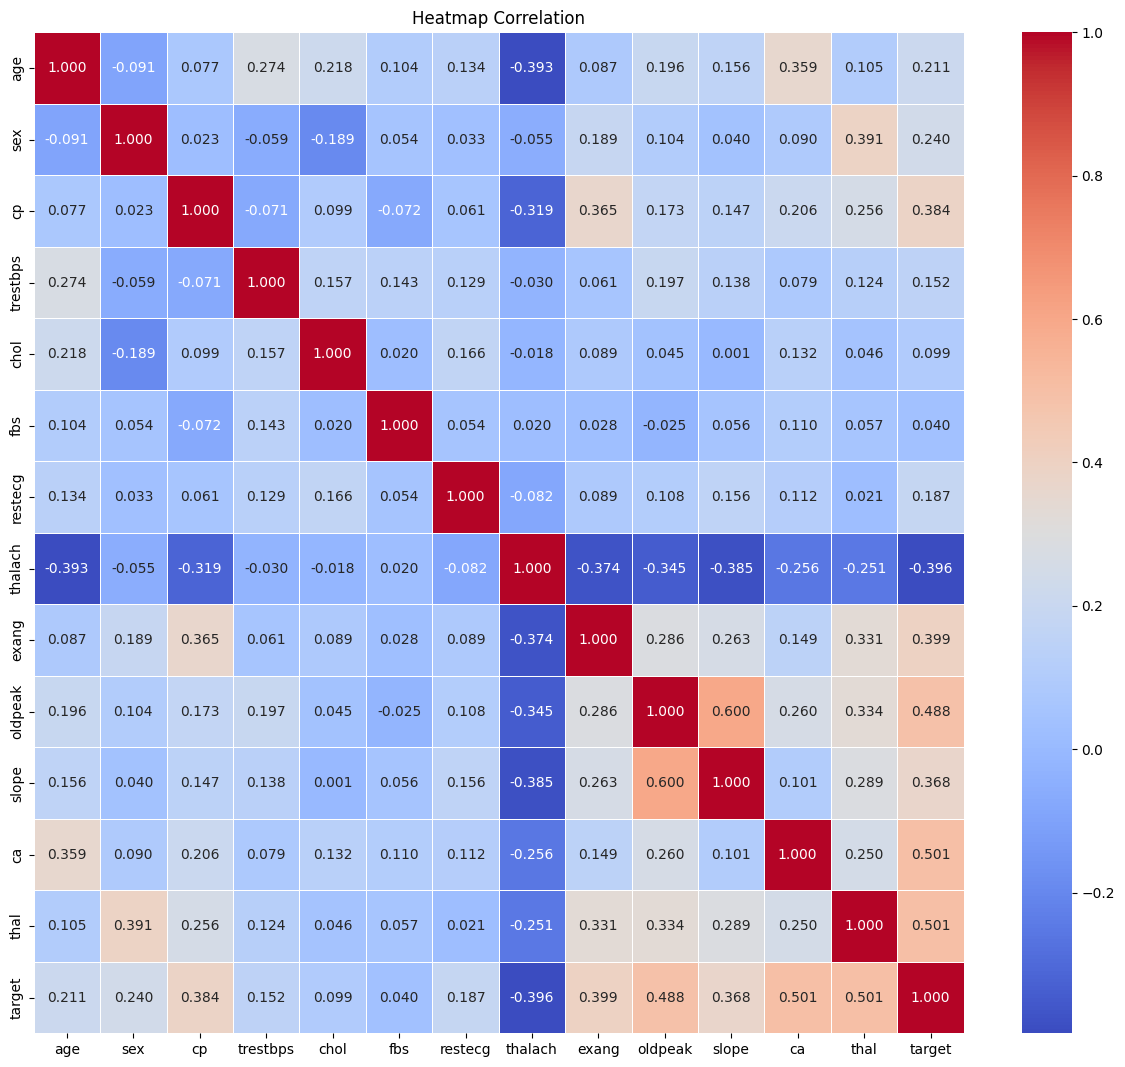

In [ ]:
# visualisasi dari korelasi antar fitur - cara umum
import matplotlib.pyplot as plt
import seaborn as sns

corr_mat = dfClean.corr()
plt.figure(figsize=(15,13))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
plt.title('Heatmap Correlation')
plt.show()

<Axes: >

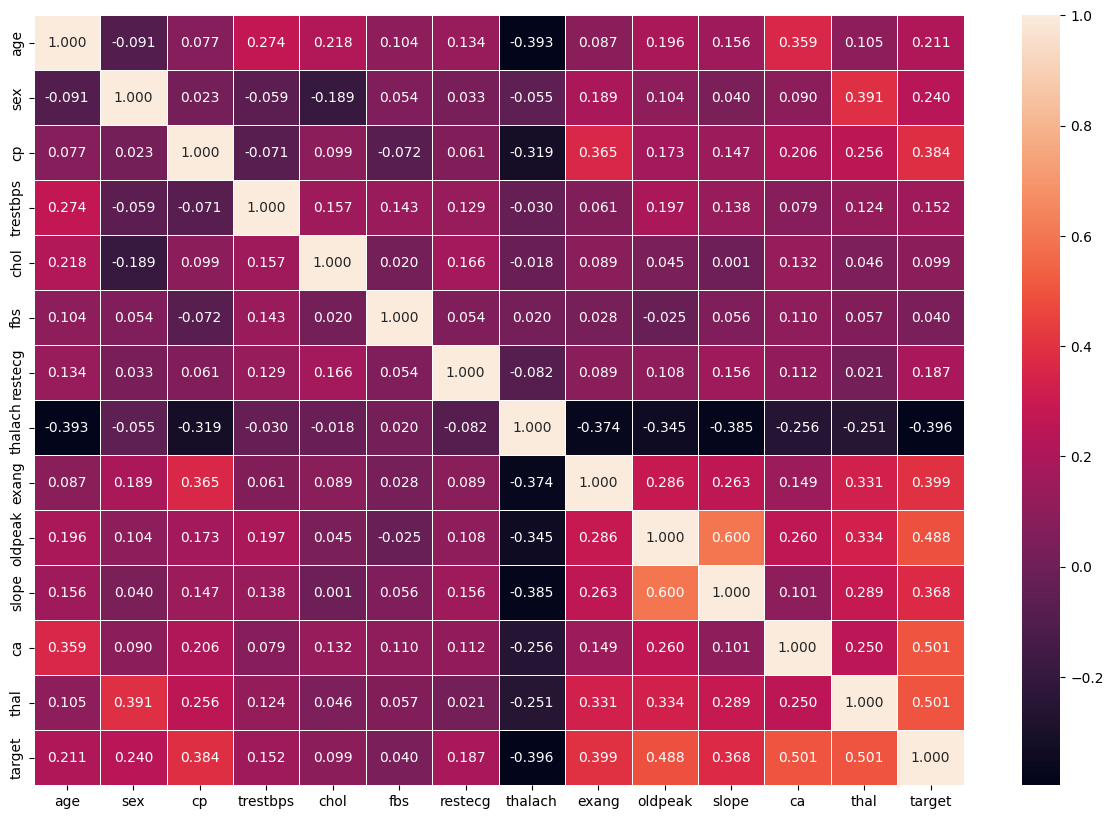

In [ ]:
# visualisasi korelasi antar fitur
import matplotlib.pyplot as plt
import seaborn as sns

cor_mat = dfClean.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt=".3f")

In [ ]:
# melihat statistik deskriptif
dfClean.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.659574,4.666667,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,0.934356,1.937334,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
# melihat nilai unik dari data
for i in range(dfClean.shape[1]):
  print(f"Kolom {dfClean.columns[i]}:")
  print(dfClean[dfClean.columns[i]].unique(), "\n")

Kolom age:
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.] 

Kolom sex:
[1. 0.] 

Kolom cp:
[1. 4. 3. 2.] 

Kolom trestbps:
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154.] 

Kolom chol:
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.


In [ ]:
sel_col = ['age','trestbps','chol','thalach','oldpeak']
cat_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

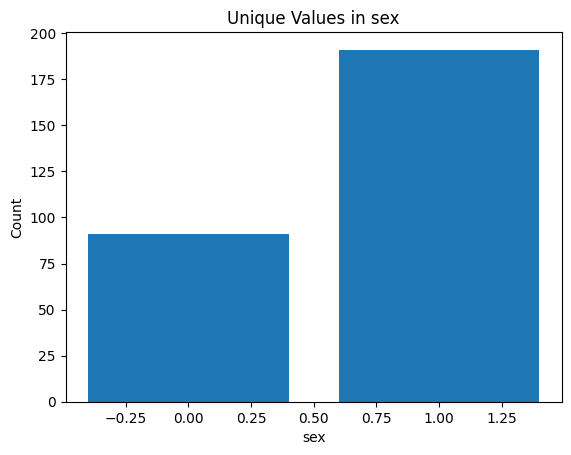

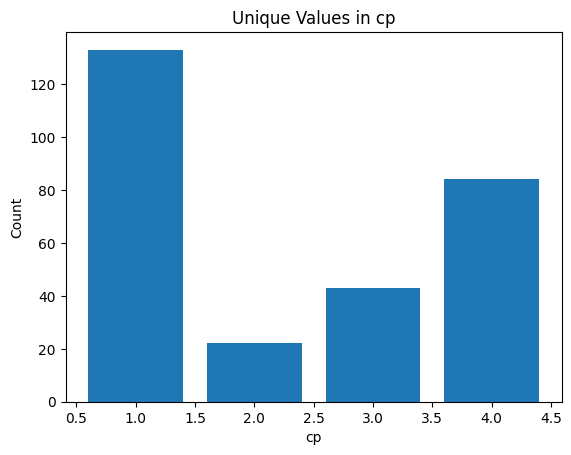

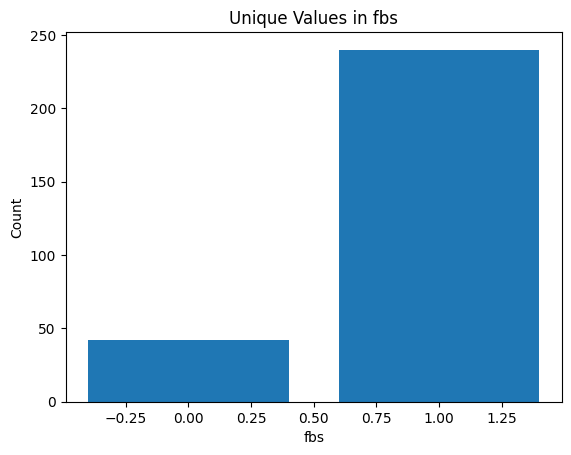

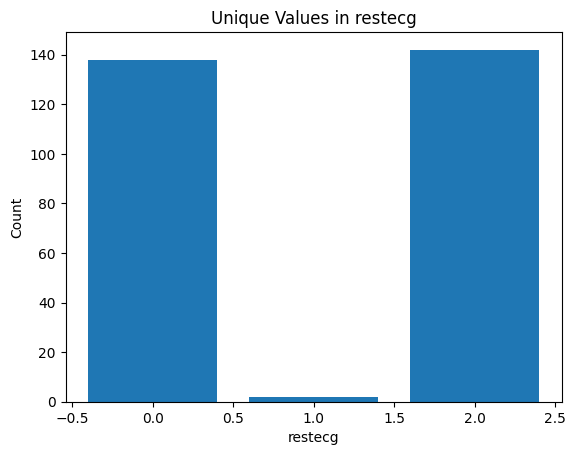

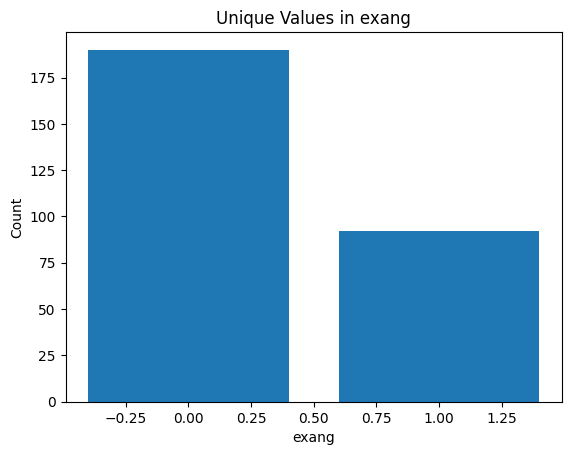

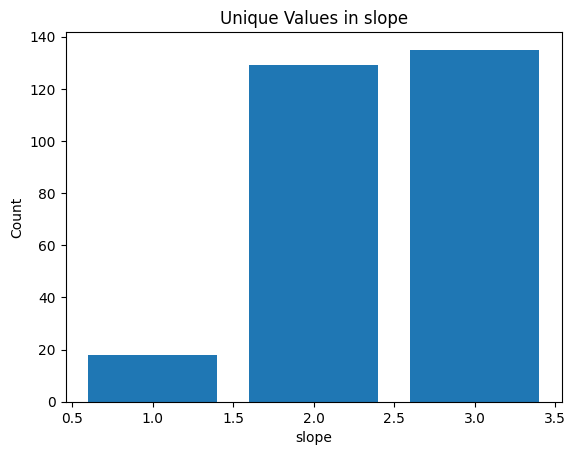

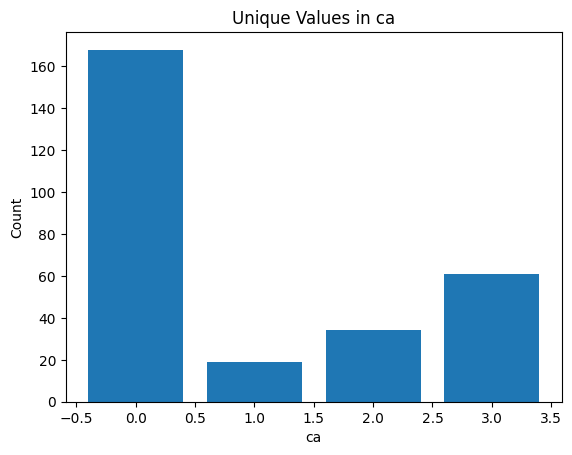

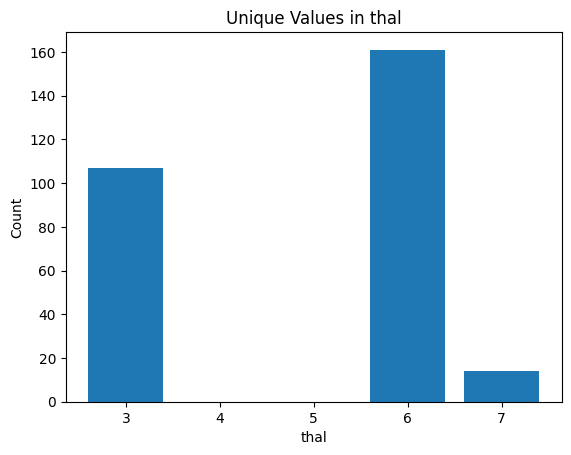

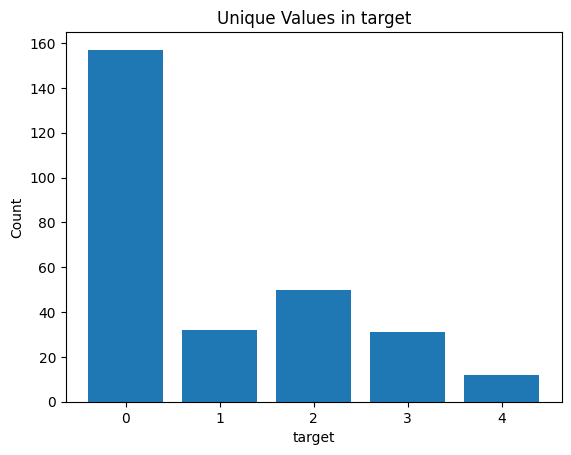

In [ ]:
# melihat visualisasi jumlah nilai unik setiap fitur kategorik
for column in cat_col:
    unique_values = dfClean[column].unique()
    value_counts = dfClean[column].value_counts()

    # Membuat plot batang
    plt.bar(unique_values, value_counts)

    # Menambahkan judul dan label sumbu
    plt.title(f'Unique Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    # Menampilkan plot
    plt.show()

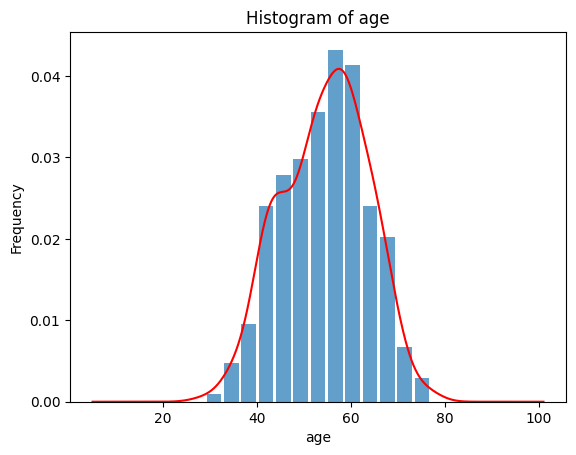

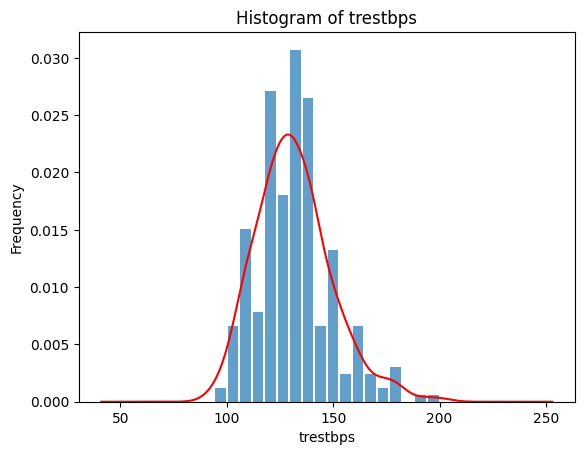

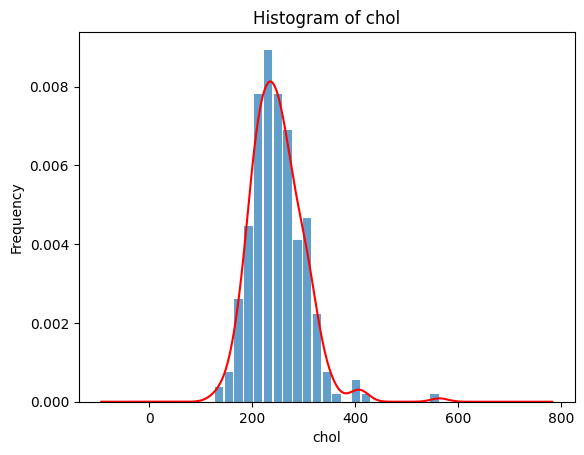

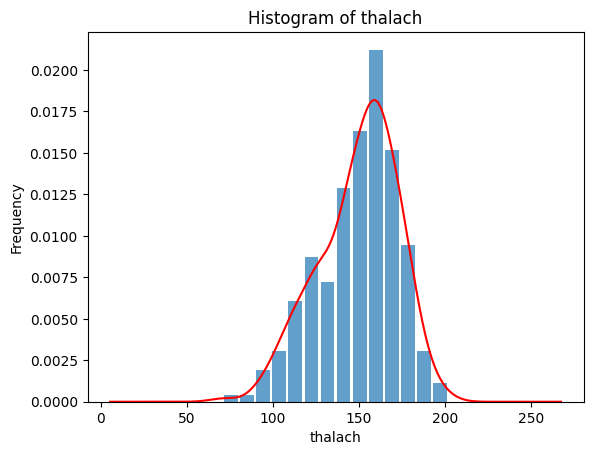

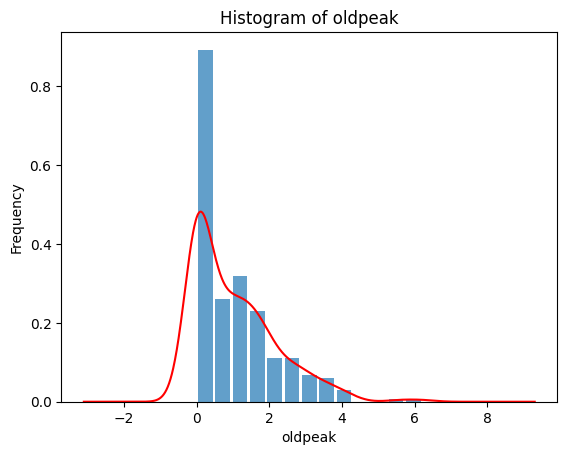

In [ ]:
# visualisasi distribusi setiap kolom dalam data
# Visualisasi histogram untuk setiap kolom
for column in sel_col:
    # Membuat histogram
    plt.hist(dfClean[column], bins='auto', alpha=0.7, density=True, rwidth=0.85)

    # Menambahkan garis distribusi
    density = pd.Series(dfClean[column]).plot.kde(color='red')

    # Menambahkan judul dan label sumbu
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Menampilkan plot
    plt.show()

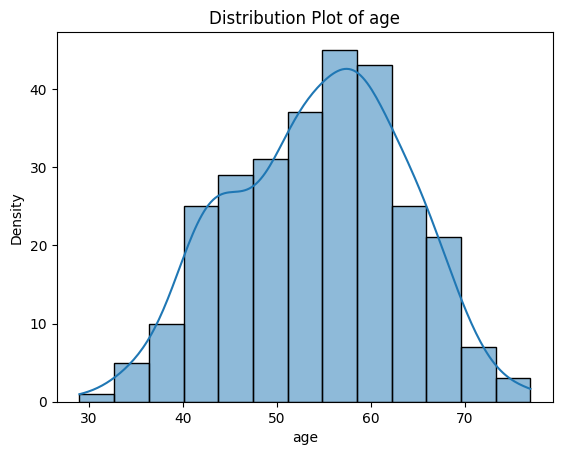

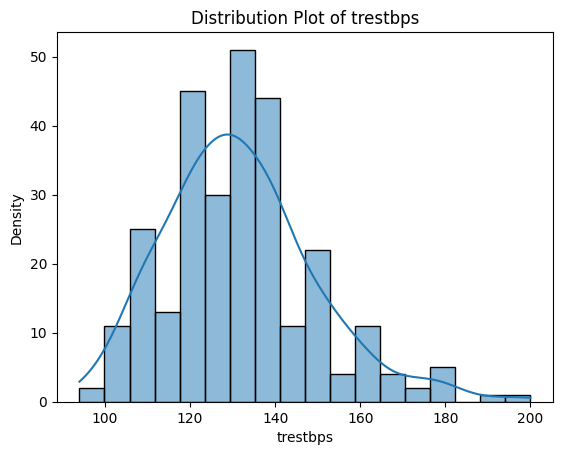

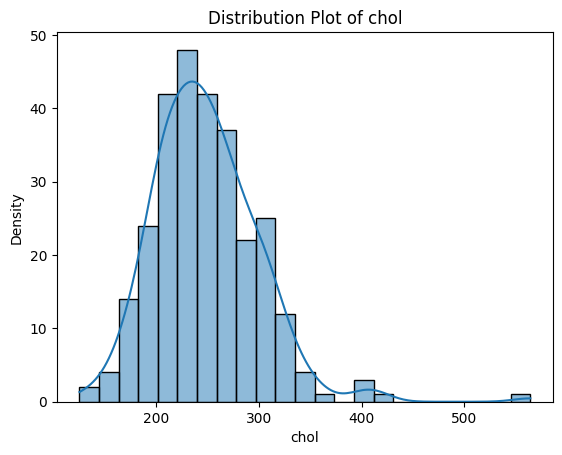

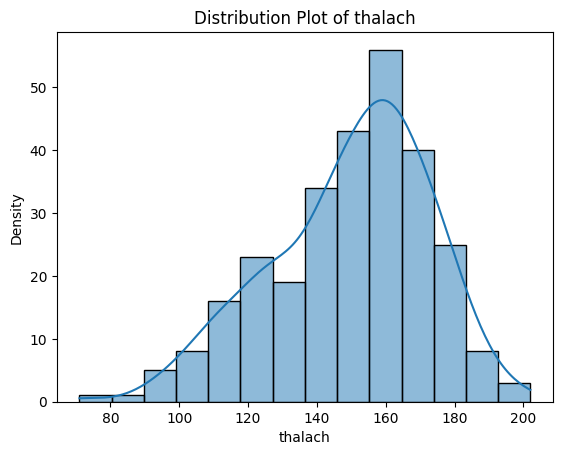

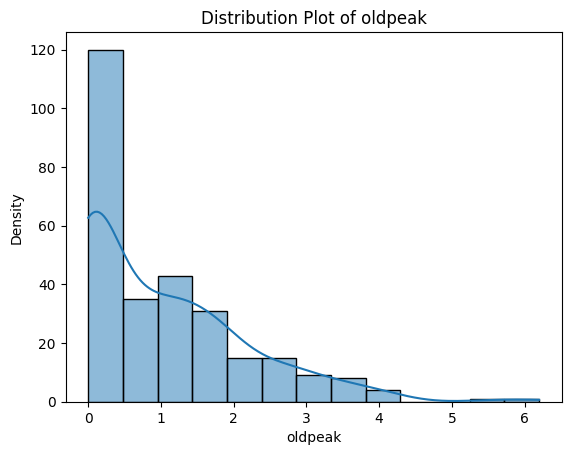

In [ ]:
# Visualisasi histogram untuk setiap kolom dengan seaborn
for column in sel_col:
    # Membuat histogram dengan KDE
    sns.histplot(dfClean[column], kde=True)

    # Menambahkan judul dan label sumbu
    plt.title(f'Distribution Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

    # Menampilkan plot
    plt.show()

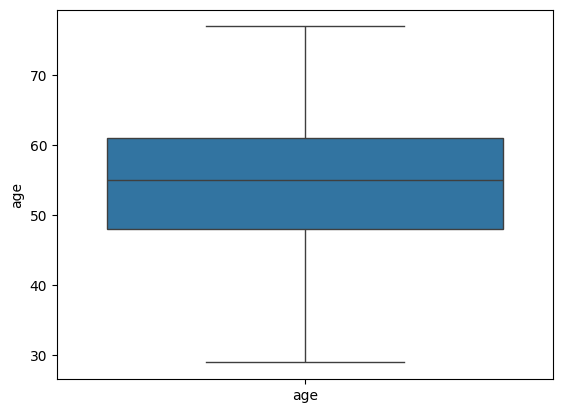

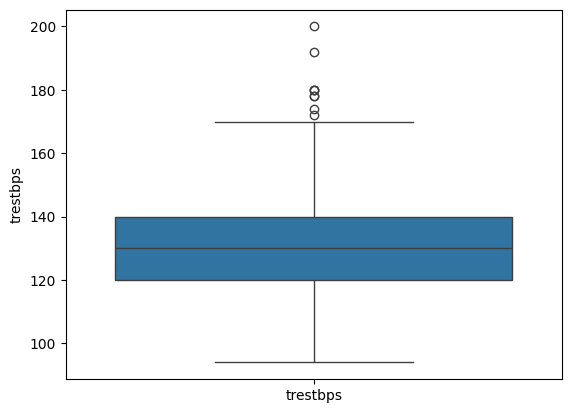

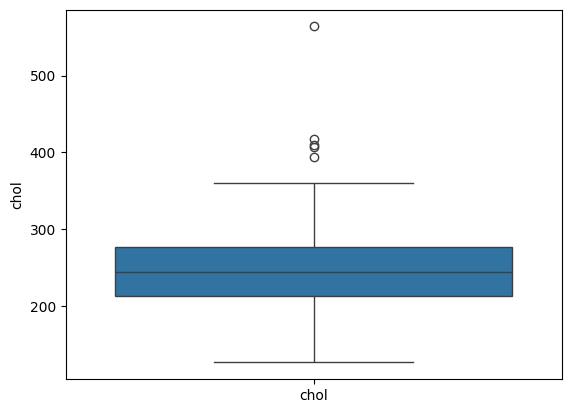

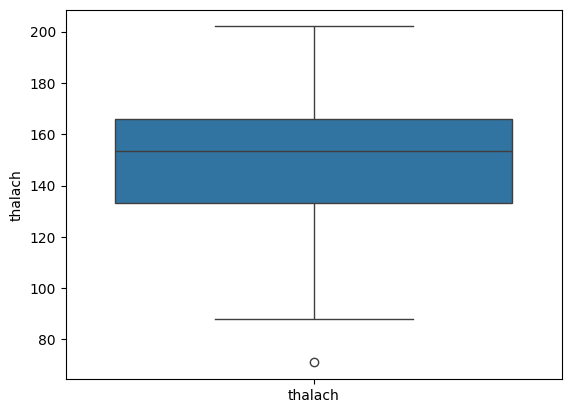

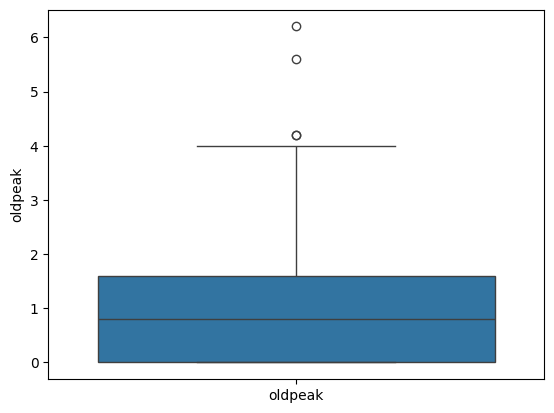

In [ ]:
# deteksi outlier dengan boxplot

# for i in range(dfClean.shape[1]-1):
#   sns.boxplot(data=dfClean[dfClean.columns[i]])
#   plt.xticks(range(1), labels=[dfClean.columns[i]])
#   plt.show()

for i in sel_col:
  sns.boxplot(data=dfClean[i])
  plt.xticks(range(1), labels=[i])
  plt.show()

In [ ]:
# menangani outlier dengan IQR -> cara pertama
# for i in sel_col:
#     Q1 = df[i].quantile(0.25)
#     Q3 = df[i].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Identifikasi outliers
#     outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]

#     if not outliers.empty:
#         # Hitung nilai mean dari data yang bukan outlier
#         feature_mean = df[~((df[i] < lower_bound) | (df[i] > upper_bound))][i].mean()

#         # Ganti nilai outlier dengan nilai mean
#         df.loc[(df[i] < lower_bound) | (df[i] > upper_bound), i] = feature_mean

In [ ]:
# menangani outlier dengan IQR -> cara kedua
for i in sel_col:
    Q1 = dfClean[i].quantile(0.25)
    Q3 = dfClean[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti nilai outlier dengan nilai mean
    dfClean[i] = dfClean[i].apply(lambda x: dfClean[i].mean() if x < lower_bound or x > upper_bound else x)

<ipython-input-32-7e2f8a8c64bf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean[i] = dfClean[i].apply(lambda x: dfClean[i].mean() if x < lower_bound or x > upper_bound else x)
<ipython-input-32-7e2f8a8c64bf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean[i] = dfClean[i].apply(lambda x: dfClean[i].mean() if x < lower_bound or x > upper_bound else x)
<ipython-input-32-7e2f8a8c64bf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

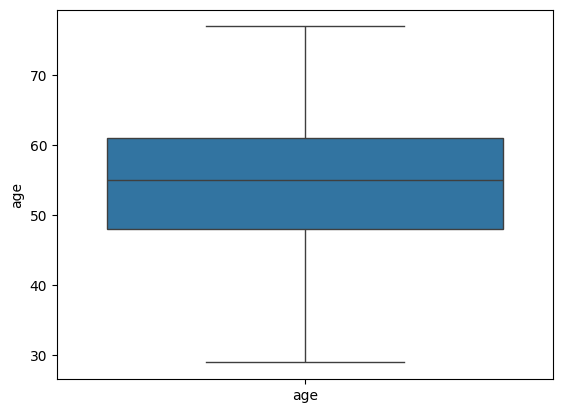

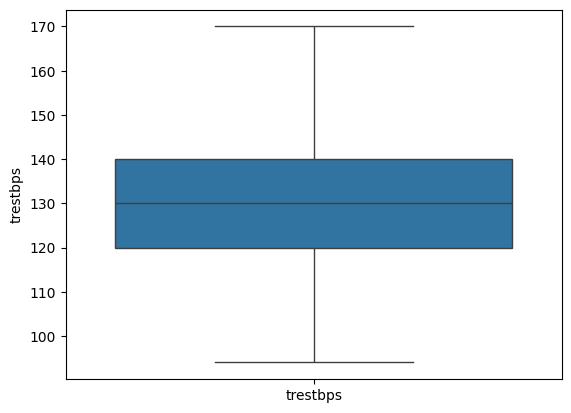

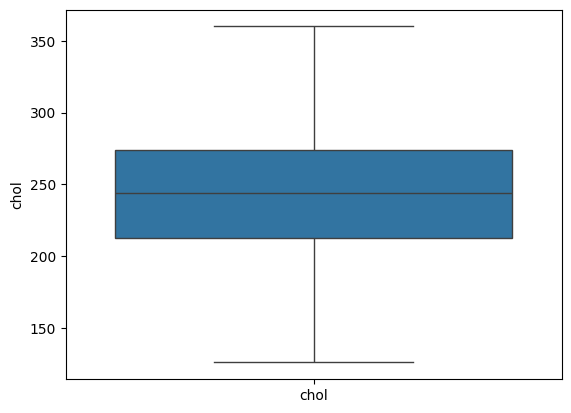

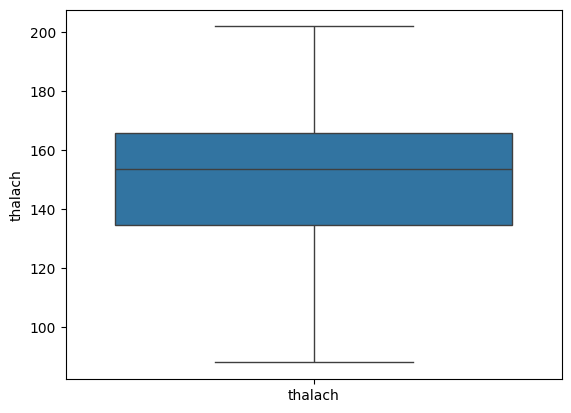

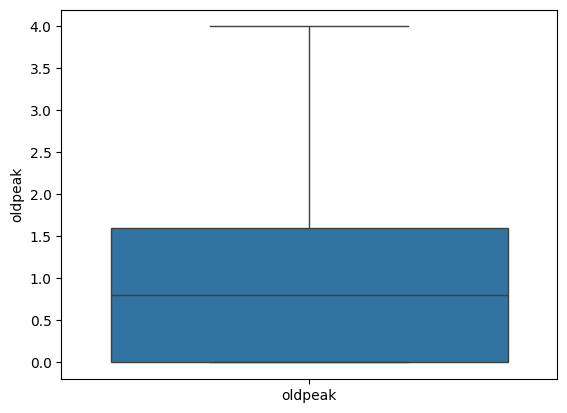

In [ ]:
# melihat kembali outlier dengan boxplot
for i in sel_col:
  sns.boxplot(data=dfClean[i])
  plt.xticks(range(1), labels=[i])
  plt.show()

# 6) Konstruksi Data

In [ ]:
# cek data
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [ ]:
# memisahkan antara fitur dan target dari dataset
X = dfClean.drop("target", axis=1).values
y = dfClean.iloc[:, -1]

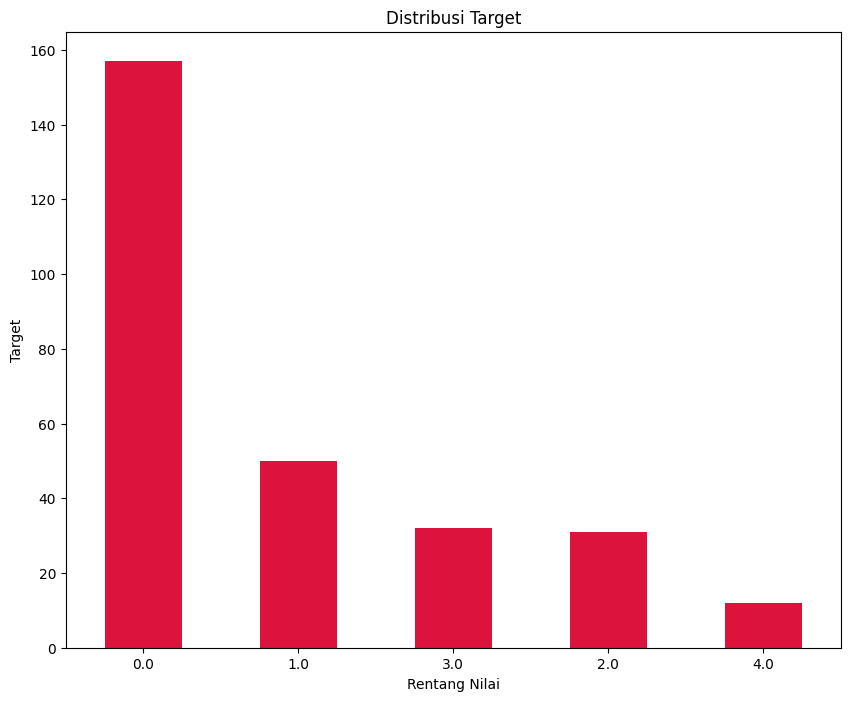

In [ ]:
# visualisasi distribusi data - cara umum
dfClean['target'].value_counts().plot(kind='bar', figsize=(10,8), color='crimson')
plt.xticks(rotation=0)
plt.xlabel('Rentang Nilai')
plt.ylabel('Target')
plt.title('Distribusi Target')
plt.show()

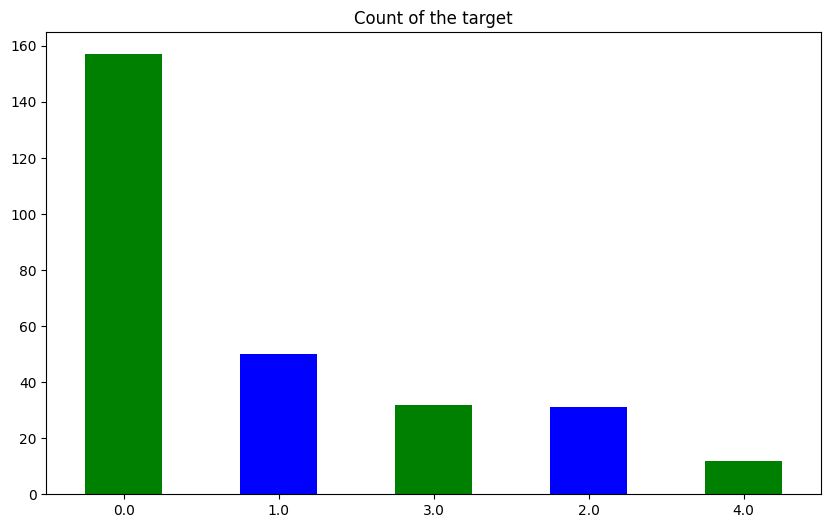

In [ ]:
# visualisasi distribusi data
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0); # -> merotasi label dari nilai pada kolom yang dipilih di sumbu x

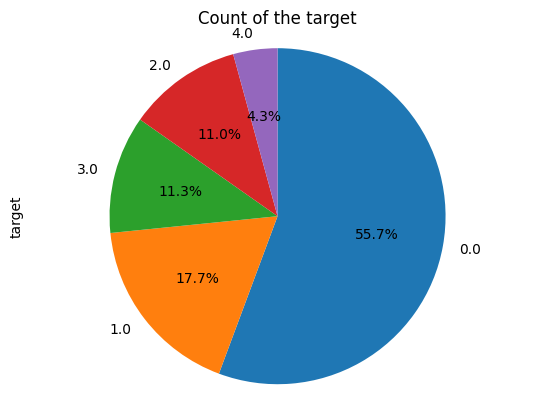

In [ ]:
# visualisasi dengan pie chart
dfClean['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False) # counterclock=False searah jarum jam
plt.title('Count of the target')
plt.axis('equal')
plt.show()

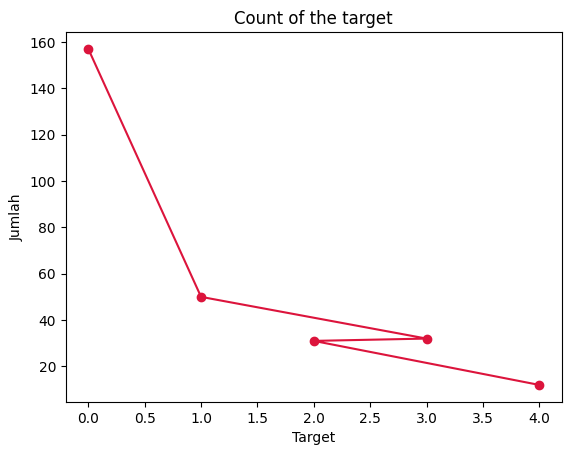

In [ ]:
dfClean['target'].value_counts().plot(kind='line', marker='o', color='crimson')
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.title('Count of the target')

# Menampilkan teks nilai di atas setiap titik pada garis
# for i, v in enumerate(dfClean['target'].value_counts().sort_index()):
#     ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

In [ ]:
# karena data terdistribusi tidak seimbang, maka -
# perlu dilakukan penyeimbangan distribusi data -
# salah satu teknik yang digunakan adalah oversampling SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X,y)

In [ ]:
new_data1 = pd.DataFrame(X_smote_resampled)
new_data1 = new_data1.drop_duplicates()
new_data2 = pd.DataFrame(y_smote_resampled)
column_mapping = {
    0: 'age',
    1: 'sex',
    2: 'cp',
    3: 'trestbps',
    4: 'chol',
    5: 'fbs',
    6: 'restecg',
    7: 'thalach',
    8: 'exang',
    9: 'oldpeak',
    10: 'slope',
    11: 'ca',
    12: 'thal'
}
new_data1.rename(columns=column_mapping, inplace=True)
new_complete_data = pd.concat([new_data1, new_data2], axis=1)
new_complete_data.to_csv("processed_data.csv", index=False)

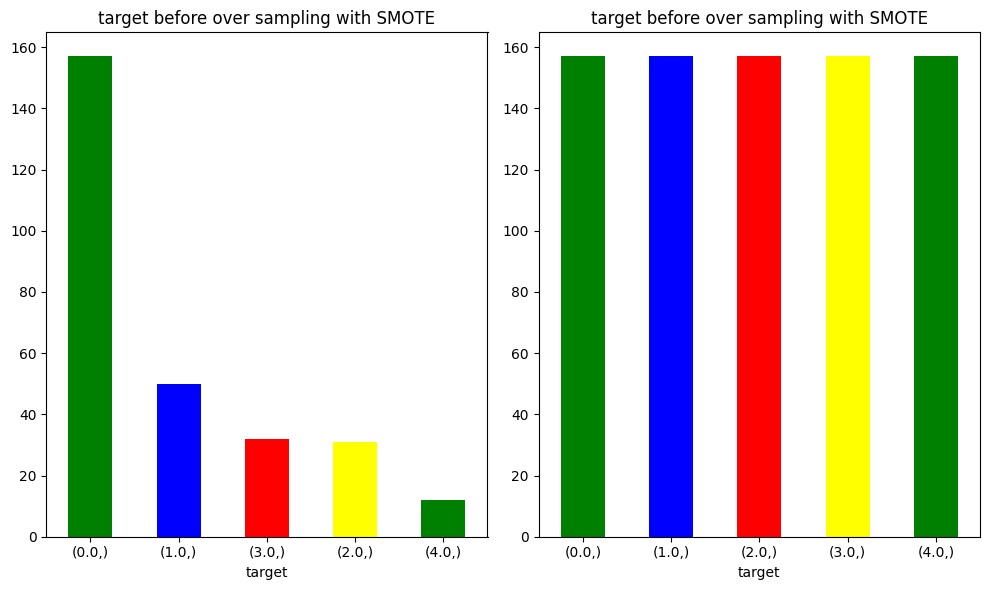

In [ ]:
# visualisasi data perbandingan sebelum dan sesudah oversampling
plt.figure(figsize=(12,4))
new_df1 = pd.DataFrame(data=y)
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("target before over sampling with SMOTE")
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
new_df2  =pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("target before over sampling with SMOTE")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
# cek distribusi data
new_df1=pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       157
1.0        50
3.0        32
2.0        31
4.0        12
dtype: int64

In [ ]:
# cek distribusi data setelah over sampling
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       157
1.0       157
2.0       157
3.0       157
4.0       157
dtype: int64

In [ ]:
# melakukan validasi statistik setelah data sudah rapi
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,129.968349,245.739223,0.148936,1.014184,150.045269,0.326241,0.969886,1.585106,0.659574,4.666667,0.907801
std,9.053083,0.468338,0.955405,15.181784,43.637769,0.356658,0.998118,22.435394,0.469670,1.025836,0.609700,0.934356,1.937334,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,274.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000,4.000000


In [ ]:
# karena data memiliki rentang yang signifikan, maka transformasi data -
# perlu dilakukan dengan normalisasi MinMaxScaler
# normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

len(X_smote_resampled_normal)

785

In [ ]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,0.562121,0.766571,0.814338,0.505492,0.518911,0.150942,0.607258,0.480836,0.454627,0.354894,0.381796,0.352349,0.634504
std,0.167095,0.379299,0.279168,0.183588,0.181308,0.317388,0.440435,0.179865,0.445619,0.265589,0.259751,0.327873,0.428227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458333,0.606429,0.666667,0.368421,0.392743,0.000000,0.000000,0.347139,0.000000,0.125688,0.068760,0.000000,0.070302
50%,0.593917,1.000000,1.000000,0.494261,0.514058,0.000000,0.898554,0.480647,0.348039,0.340205,0.500000,0.333333,0.892077
75%,0.681174,1.000000,1.000000,0.624747,0.637928,0.000000,1.000000,0.622807,1.000000,0.534098,0.500000,0.661883,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

# membagi fitur dan target menjadi data train dan data test (untuk oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

# membagi fitur dan target menjadi data train dan test (untuk yang oversample  normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

# 7) Modelling

In [ ]:
from sklearn.metrics import accuracy_score, recall_score,f1_score, precision_score, confusion_matrix

# membuat fungsi untuk melihat validasi
def evaluation(Y_test, Y_pred):
  acc = accuracy_score(Y_test, Y_pred)
  rcl = recall_score(Y_test, Y_pred, average = 'weighted')
  f1 = f1_score(Y_test, Y_pred, average = 'weighted')
  ps = precision_score(Y_test, Y_pred, average = 'weighted')

  metric_dict = {'accuracy': round(acc,3),
                 'recall': round(rcl,3),
                 'precision': round(ps, 3),
                 'F1-score': round(f1, 3)}

  return print(metric_dict)

In [ ]:
# import library model dan evaluasi
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Oversample

In [ ]:
# membangun dan training model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy:", accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89        32
         1.0       0.90      0.84      0.87        31
         2.0       0.94      0.94      0.94        31
         3.0       0.94      0.97      0.95        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.93       157
   macro avg       0.93      0.93      0.93       157
weighted avg       0.93      0.93      0.93       157



In [ ]:
# menampilkan hasil evaluasi dengan fungsi yang dibuat sebelumnya
evaluation(y_test, y_pred_rf)

{'accuracy': 0.93, 'recall': 0.93, 'precision': 0.93, 'F1-score': 0.93}


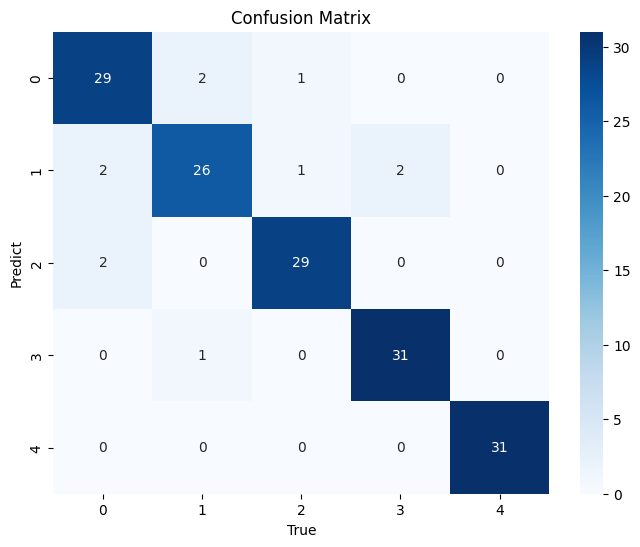

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Oversample + Normalisasi

In [ ]:
# membangun dan training model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_normal)

In [ ]:
# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89        32
         1.0       0.90      0.84      0.87        31
         2.0       0.94      0.94      0.94        31
         3.0       0.94      0.97      0.95        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.93       157
   macro avg       0.93      0.93      0.93       157
weighted avg       0.93      0.93      0.93       157



In [ ]:
# menampilkan hasil evaluasi dengan fungsi yang dibuat sebelumnya
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.93, 'recall': 0.93, 'precision': 0.93, 'F1-score': 0.93}


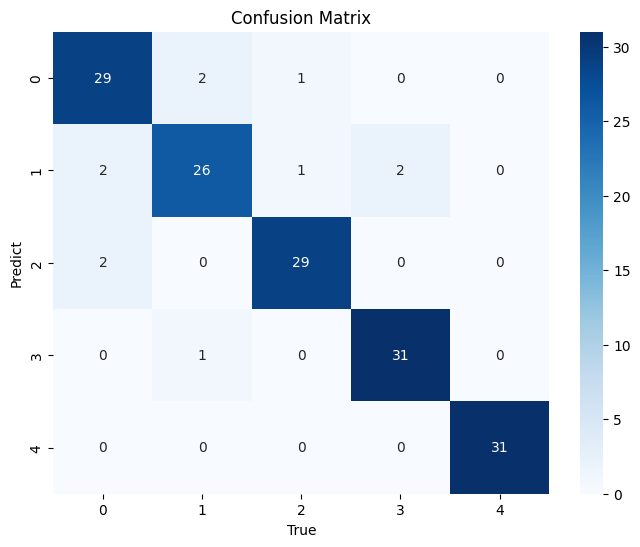

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# 8) Evaluasi

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
model_comp1 = pd.DataFrame({'Model': ['Random Forest'], 'Accuracy': [accuracy_rf_smote*100]})
model_comp1.head()

,Model,Accuracy
0,Random Forest,93.0


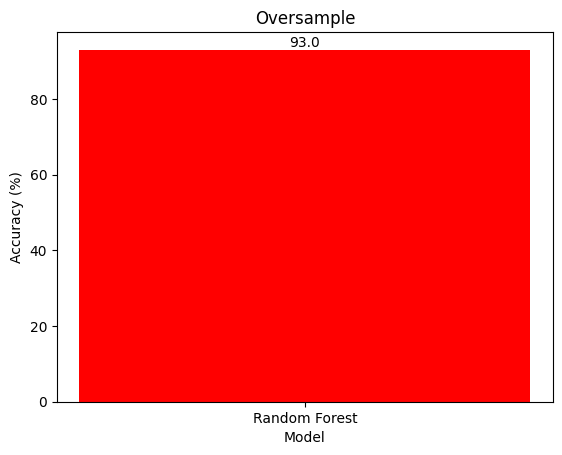

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=0, ha='center') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

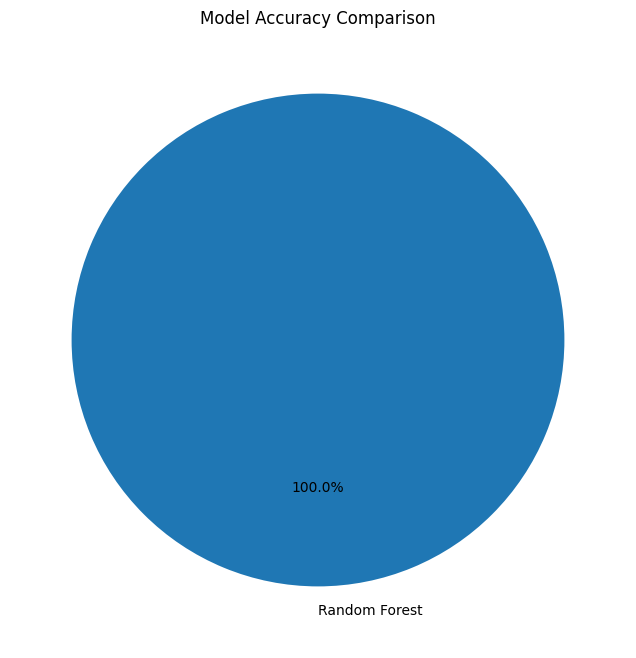

In [ ]:
# Visualisasi Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(model_comp1['Accuracy'], labels=model_comp1['Model'], autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Model Accuracy Comparison')
plt.show()

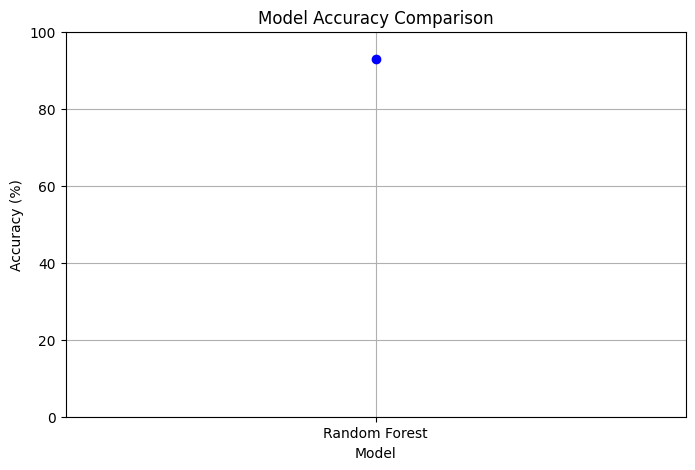

In [ ]:
# Visualisasi Line Chart
plt.figure(figsize=(8, 5))
plt.plot(model_comp1['Model'], model_comp1['Accuracy'], marker='o', linestyle='-', color='b')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=0, ha='center')
plt.grid(True)
# Set label sumbu y dimulai dari 0 - 100
plt.ylim(0, 100)
plt.show()

In [ ]:
model_comp2 = pd.DataFrame({'Model': ['Random Forest'], 'Accuracy': [accuracy_rf_smote_normal*100]})
model_comp2.head()

,Model,Accuracy
0,Random Forest,93.0


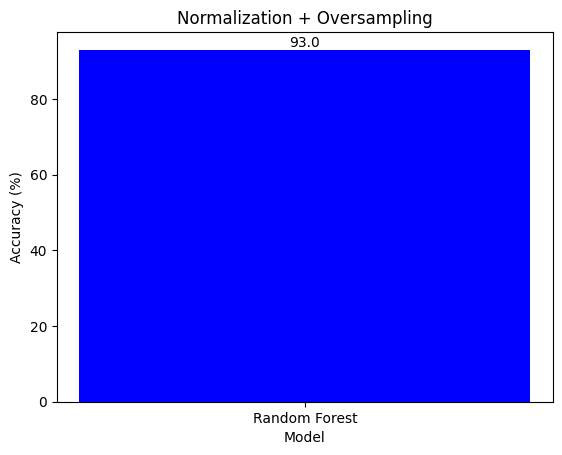

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=0, ha='center') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

## Kesimpulan

### Switzerland Data

#### 1) Mengumpulkan Data

#### 2) Telaah Data

In [ ]:
# pip install h5py
# pip install joblib

In [ ]:
## library sepuh
# import pandas as pd
# import numpy as np
# import sklearn

## library visualisasi data
# import matplotlib.pyplot as plt
# import seaborn as sns

## library import transformer & encoder
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder # encoder
# from sklearn.preprocessing import MinMaxScaler, StandardScaler #-> transformasi data
# from sklearn.model_selection import train_test_split

## library save load model
# import pickle
# from sklearn.externals import joblib

## library import teknik sampling
# from imblearn.over_sampling import SMOTE # teknik -> oversampling
# from imblearn.under_sampling import RandomUnderSampler # teknik -> undersampling

In [ ]:
## cara teknik sampling

# Undersampling
# from imblearn.over_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)
# X_smote_resampled, y_smote_resampled = rus.fit_resample(X,y)

# Oversampling
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_smote_resampled, y_smote_resampled = smote.fit_resample(X,y)

In [ ]:
## cara save model
# joblib.dump(nb_model, 'naive_bayes_model.joblib')

# with open('naive_bayes_model.pkl', 'wb') as file:
#     pickle.dump(nb_model, file)

# cara load model
# loaded_nb_model = joblib.load('naive_bayes_model.joblib')

# with open('naive_bayes_model.pkl', 'rb') as file:
#     loaded_nb_model = pickle.load(file)

In [ ]:
## cara menangani outlier dengan IQR

# import pandas as pd

## membaca dataset publik
# data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

## menentukan batas outlier
# q1 = data[0].quantile(0.25)
# q3 = data[0].quantile(0.75)
# iqr = q3 - q1
# lower_bound = q1 - (1.5 * iqr)
# upper_bound = q3 + (1.5 * iqr)

## menggantikan outlier dengan nilai rata-rata -> jika merupakan data numerik
## data[0] -> 0 merupakan indeks kolom, bisa dengan nama kolom langsung
# data[0] = data[0].apply(lambda x: data[0].mean() if x < lower_bound or x > upper_bound else x)

## menggantikan outlier dengan nilai median -> jika merupakan data kategorik (ordinal)
# data[0] = data[0].apply(lambda x: data[0].median() if x < lower_bound or x > upper_bound else x)

## menampilkan dataset yang telah diubah
# print(data)

In [ ]:
# ## cara modelling

# from sklearn.tree import DecisionTreeClassifier
# model_dt = DecisionTreeClassifier()

# from sklearn.cluster import KMeans -> clustering
# model_kmeans = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)

# from sklearn.neighbors import KNeighborsClassifier -> clusetering
# model_knn = KNeighborsClassifier(n_neighbors=3)

# from sklearn.naive_bayes import GaussianNB
# model_nb = GaussianNB()

# from sklearn.linear_model import LinearRegression
# model_lr = LinearRegression()

# from sklearn.linear_model import LogisticRegression
# LR = LogisticRegression(solver = 'liblinear')

# from sklearn.ensemble import RandomForestClassifier
# model_rf = RandomForestClassifier()

# from xgboost import XGBClassifier
# model_xgb = XGBClassifier()

# # training
# model.fit(X_train, y_train)
# # prediksi
# predictions = model.predict(X_test)

# from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, confusion_matrix
# # Contoh evaluasi untuk klasifikasi
# accuracy = accuracy_score(y_test, predictions)
# conf_matrix = confusion_matrix(y_test, predictions)

# # Contoh evaluasi untuk regresi
# mse = mean_squared_error(y_test, predictions)
# mae = mean_absolute_error(y_test, predictions)

In [ ]:
## cara parameter tuning

## teknik GridSearchCV
from sklearn.model_selection import GridSearchCV

# Contoh untuk Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Contoh untuk KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

## teknik RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Contoh untuk Decision Tree
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 30),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_dist_dt, n_iter=10, cv=5)
random_search_dt.fit(X_train, y_train)

# Contoh untuk KNN
param_dist_knn = {
    'n_neighbors': randint(1, 15),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

random_search_knn = RandomizedSearchCV(KNeighborsClassifier(), param_dist_knn, n_iter=10, cv=5)
random_search_knn.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Data training dan target
X_train, y_train = ...

# Parameter yang akan dituning
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Model Gaussian Naive Bayes
naive_bayes = GaussianNB()

# GridSearchCV
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Parameter terbaik setelah tuning
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# ==============================================================================

from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Data training dan target
X_train, y_train = ...

# Parameter yang akan dituning
param_dist = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Model Gaussian Naive Bayes
naive_bayes = GaussianNB()

# RandomizedSearchCV
random_search = RandomizedSearchCV(naive_bayes, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Parameter terbaik setelah tuning
best_params = random_search.best_params_
print("Best Parameters:", best_params)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import numpy as np

# Data training dan target
X_train, y_train = ...

# Parameter yang akan dituning
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# Model Regresi Linear
linear_regression = LinearRegression()

# GridSearchCV
grid_search = GridSearchCV(linear_regression, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Parameter terbaik setelah tuning
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# ===============================================================================

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Data training dan target
X_train, y_train = ...

# Parameter yang akan dituning
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 200, 500]
}

# Model Regresi Logistik
logistic_regression = LogisticRegression()

# RandomizedSearchCV
random_search = RandomizedSearchCV(logistic_regression, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Parameter terbaik setelah tuning
best_params = random_search.best_params_
print("Best Parameters:", best_params)

In [ ]:
## inget tinggal ganti dari random ke grid atau sebaliknya

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Data training dan target
X_train, y_train = ...

# Parameter yang akan dituning
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Model Random Forest
random_forest = RandomForestClassifier()

# RandomizedSearchCV
random_search_rf = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train, y_train)

# Parameter terbaik setelah tuning
best_params_rf = random_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

# ==============================================================================

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

# Data training dan target
X_train, y_train = ...

# Parameter yang akan dituning
param_dist = {
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

# Model XGBoost
xgb_classifier = xgb.XGBClassifier()

# RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_xgb.fit(X_train, y_train)

# Parameter terbaik setelah tuning
best_params_xgb = random_search_xgb.best_params_
print("Best Parameters for XGBoost:", best_params_xgb)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import numpy as np

# Data training dan target
X_train, y_train = ...

# Parameter yang akan dituning
param_dist_svc = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}

# Model SVC
svc_classifier = SVC()

# RandomizedSearchCV
random_search_svc = RandomizedSearchCV(svc_classifier, param_distributions=param_dist_svc, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_svc.fit(X_train, y_train)

# Parameter terbaik setelah tuning
best_params_svc = random_search_svc.best_params_
print("Best Parameters for SVM Classifier:", best_params_svc)

# ==============================================================================

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import numpy as np

# Data training dan target
X_train, y_train = ...

# Parameter yang akan dituning
param_dist_svr = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    'epsilon': [0.01, 0.1, 0.2, 0.5, 1.0]
}

# Model SVR
svr_regressor = SVR()

# RandomizedSearchCV
random_search_svr = RandomizedSearchCV(svr_regressor, param_distributions=param_dist_svr, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search_svr.fit(X_train, y_train)

# Parameter terbaik setelah tuning
best_params_svr = random_search_svr.best_params_
print("Best Parameters for SVM Regressor:", best_params_svr)

In [ ]:
# cara menentukan nilai k terbaik pada k-means
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Contoh data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Menyimpan nilai inersia untuk setiap nilai k
inertia_values = []

# Eksperimen dengan nilai k dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting inersia untuk berbagai nilai k
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
## mengubah format data menjadi format yang konsisten seperti -
## mengubah format tanggal menjadi format yang sama

import pandas as pd

# Contoh dataset dengan kolom tanggal dalam format yang berbeda
data = {
    'Tanggal': ['2021-08-01', '02-08-2021', '2021/08/03', '20210804']
}
df = pd.DataFrame(data)

# Tampilkan dataset sebelum perubahan format
print("Dataset sebelum perubahan format:")
print(df)

# Ubah format tanggal menjadi format yang sama (YYYY-MM-DD)
df['Tanggal'] = pd.to_datetime(df['Tanggal'], errors='coerce').dt.strftime('%Y-%m-%d')

# Tampilkan dataset setelah perubahan format
print("\nDataset setelah perubahan format:")
print(df)

In [ ]:
## Memperbaiki data yang salah ketik atau typo

import pandas as pd
from sklearn.datasets import load_iris

# Load dataset Iris dari scikit-learn
data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
iris_df['species'] = data.target_names[data.target]

# Contoh data dengan salah ketik atau typo
iris_df.iloc[0, 0] = 5.1
iris_df.iloc[1, 1] = 3.6

# Tampilkan dataset sebelum pembersihan data
print("Dataset sebelum pembersihan data:")
print(iris_df)

# Koreksi data salah ketik atau typo
# Misalnya, jika nilai 3.6 pada kolom 'sepal width (cm)' seharusnya 3.0
iris_df.loc[iris_df['sepal width (cm)'] == 3.6, 'sepal width (cm)'] = 3.0

# Tampilkan dataset setelah pembersihan data
print("\nDataset setelah pembersihan data:")
print(iris_df)

In [ ]:
## Menangani Malformed Record

import pandas as pd

# membaca dataset
data = pd.read_csv("nama_file.csv")

# mengecek dan menghapus record yang tidak sesuai dengan format atau struktur yang diharapkan
for i, row in data.iterrows():
    if not format_check(row):
        data.drop(i, inplace=True)

# menampilkan dataset yang telah diubah
print(data)

In [ ]:
## Mengubah record yang tidak sesuai dengan format atau struktur yang diharapkan

#| code-fold: true
import pandas as pd

# membaca dataset dari file csv
data = pd.read_csv('nama_file.csv')

# fungsi untuk melakukan pengecekan format atau struktur pada setiap record dalam dataset
def format_check(record):
    # implementasi pengecekan format atau struktur pada satu record
    # return True jika format atau struktur sesuai, False jika tidak sesuai

# melakukan iterasi pada setiap record dalam dataset
for index, row in data.iterrows():
    # cek apakah format atau struktur record sesuai dengan yang diharapkan
    if not format_check(row):
        # jika tidak sesuai, hapus record dari dataset
        data = data.drop(index)

# menampilkan dataset yang telah diubah
print(data)

In [ ]:
## teknik seleksi fitur


    import pandas as pd
    from sklearn.datasets import load_iris
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_classif

    # Load dataset contoh
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Buat DataFrame
    df = pd.DataFrame(data=X, columns=[f'feature_{i}' for i in range(X.shape[1])])
    df['target'] = y

    # Tampilan DataFrame asli
    print("DataFrame Asli:")
    print(df.head(10))

    # Seleksi Fitur dengan ANOVA (f_classif)
    k_best = SelectKBest(score_func=f_classif, k=2)  # Pilih 2 fitur terbaik
    X_selected = k_best.fit_transform(X, y)

    # Tampilan DataFrame setelah seleksi fitur
    selected_df = pd.DataFrame(data=X_selected, columns=['selected_feature_1', 'selected_feature_2'])
    selected_df['target'] = y
    print("\nDataFrame Setelah Seleksi Fitur:")
    print(selected_df.head(10))

In [ ]:
## PCA -> unsupervised learning

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Inisialisasi dan menerapkan PCA
pca = PCA(n_components=2)  # Pilih jumlah komponen yang diinginkan
X_pca = pca.fit_transform(X)

# Konversi hasil ke DataFrame untuk visualisasi
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = y

# Tampilkan DataFrame hasil PCA
print(df_pca.head())

In [ ]:
## LDA -> supervised learning

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Inisialisasi dan menerapkan LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # Pilih jumlah komponen yang diinginkan
X_lda = lda.fit_transform(X, y)

# Konversi hasil ke DataFrame untuk visualisasi
df_lda = pd.DataFrame(data=X_lda, columns=['Linear Discriminant 1', 'Linear Discriminant 2'])
df_lda['Target'] = y

# Tampilkan DataFrame hasil LDA
print(df_lda.head())

##### Membangun model ANN dengan spesifikasi berikut:
* Input layer memiliki 4 neuron (sesuai dengan jumlah fitur pada dataset Iris).
* Hidden layer memiliki 8 neuron dengan fungsi aktivasi ReLU.
* Output layer memiliki 3 neuron dengan fungsi aktivasi softmax, sesuai dengan jumlah kelas iris.

In [ ]:
## cara modelling ANN

# Import library yang dibutuhkan
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris

# Memuat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# Menggunakan OneHotEncoder untuk mengonversi label menjadi one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Normalisasi data
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Membangun model ANN menggunakan TensorFlow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Menentukan fungsi loss, optimizer, dan metrik
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

# Evaluasi model pada data pengujian
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Akurasi pada data pengujian: {accuracy * 100:.2f}%')

#### 3) Validasi Data